In [33]:
import sys
import tensorflow as tf
import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

In [34]:
from keras.datasets import cifar10

In [35]:
def transform_dataset():
  (trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return trainX, trainY, testX, testY

In [36]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [37]:
(trainX, trainY), (testX, testY) = cifar10.load_data()

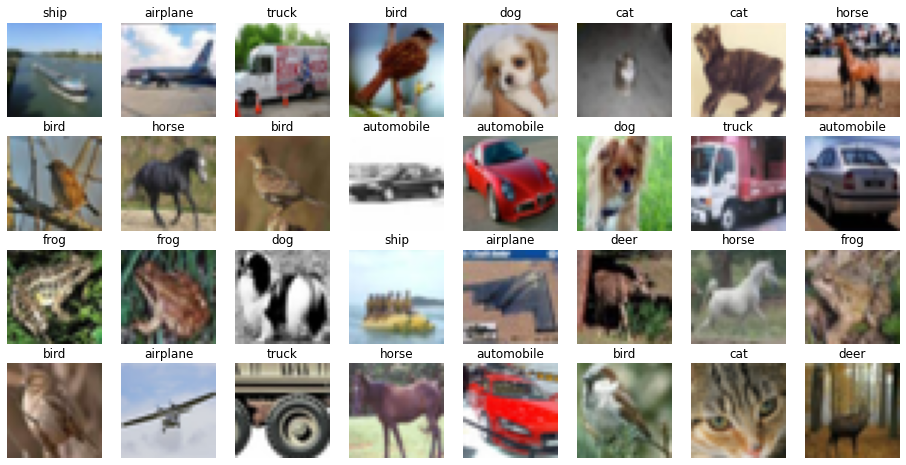

In [38]:
# show random images from training set
cols = 8 # Number of columns
rows = 4 # Number of rows

class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
num_classes = 10

fig = plt.figure(figsize=(2 * cols, 2 * rows))

# Add subplot for each random image
for col in range(cols):
    for row in range(rows):
        random_index = np.random.randint(0, len(trainY)) # Pick a random index for sampling the image
        ax = fig.add_subplot(rows, cols, col * rows + row + 1) # Add a sub-plot at (row, col)
        ax.grid(b=False) # Get rid of the grids
        ax.axis("off") # Get rid of the axis
        ax.imshow(trainX[random_index, :]) # Show random image
        ax.set_title(class_names[trainY[random_index][0]]) # Set title of the sub-plot
plt.show() # Show the image

In [39]:
trainX, trainY, testX, testY = transform_dataset()
trainX, testX = prep_pixels(trainX, testX)

In [40]:
class netA():
  def define_model(self):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=(32, 32, 3)))
    model.add(keras.layers.Dense(10))
    model.add(keras.layers.Activation('softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model
  def summary(self,history):
    pyplot.subplot(211)
    pyplot.title('NetA Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('NetA Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.tight_layout()
    plt.show()
  def run_test(self):
    model = self.define_model()
    self.history=model.fit(trainX,trainY,epochs=50, validation_data = (testX, testY))
    self.test_loss, self.test_accuracy = model.evaluate(testX, testY)
    self.train_loss, self.train_accuracy = model.evaluate(trainX, trainY)
netA=netA()
netA.run_test()

Epoch 1/50
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0536 - accuracy: 0.2841 - val_loss: 1.8342 - val_accuracy: 0.3530
Epoch 2/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8920 - accuracy: 0.3482 - val_loss: 1.8175 - val_accuracy: 0.3732
Epoch 3/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8578 - accuracy: 0.3655 - val_loss: 1.8239 - val_accuracy: 0.3573
Epoch 4/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8329 - accuracy: 0.3721 - val_loss: 1.8253 - val_accuracy: 0.3675
Epoch 5/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8344 - accuracy: 0.3720 - val_loss: 1.8475 - val_accuracy: 0.3598
Epoch 6/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8274 - accuracy: 0.3726 - val_loss: 1.7720 - val_accuracy: 0.3837
Epoch 7/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8314 - accuracy: 0.3738 - val_loss: 1.7646 - val_accuracy:

In [41]:
class netB():
  def define_model(self):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=(32, 32, 3)))
    model.add(keras.layers.Dense(300, activation='relu'))
    model.add(keras.layers.Dense(10))
    model.add(keras.layers.Activation('softmax'))
    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    return model
  def summary(self,history):
    pyplot.subplot(211)
    pyplot.title('NetB Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('NetB Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.tight_layout()
    plt.show()
  def run_test(self):
    model = self.define_model()
    self.history=model.fit(trainX,trainY,epochs=50, validation_data = (testX, testY))
    self.test_loss, self.test_accuracy = model.evaluate(testX, testY)
    self.train_loss, self.train_accuracy = model.evaluate(trainX, trainY)

netB=netB()
netB.run_test()

Epoch 1/50
1563/1563 [==============================] - 6s 4ms/step - loss: 2.0448 - accuracy: 0.2877 - val_loss: 1.7932 - val_accuracy: 0.3573
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7252 - accuracy: 0.3813 - val_loss: 1.6861 - val_accuracy: 0.4005
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6529 - accuracy: 0.4109 - val_loss: 1.5935 - val_accuracy: 0.4316
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5988 - accuracy: 0.4284 - val_loss: 1.6428 - val_accuracy: 0.4053
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5721 - accuracy: 0.4375 - val_loss: 1.5678 - val_accuracy: 0.4391
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5575 - accuracy: 0.4470 - val_loss: 1.5967 - val_accuracy: 0.4261
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5370 - accuracy: 0.4548 - val_loss: 1.5578 - val_accuracy:

In [42]:
class netC():
  def define_model(self):
    cifar10_model=keras.models.Sequential()
    cifar10_model.add(keras.layers.Conv2D(filters=25,kernel_size=5,padding="same", activation="relu", input_shape=[32,32,3]))
    cifar10_model.add(keras.layers.Conv2D(filters=25,kernel_size=5,padding="same", activation="relu"))
    cifar10_model.add(keras.layers.MaxPool2D(pool_size=5,strides=2,padding='valid'))
    cifar10_model.add(keras.layers.Dropout(0.2))
    cifar10_model.add(keras.layers.Flatten())
    cifar10_model.add(keras.layers.Dropout(0.25,noise_shape=None,seed=None))
    cifar10_model.add(keras.layers.Dense(units=128,activation='relu'))
    cifar10_model.add(keras.layers.Dropout(0.2))
    cifar10_model.add(keras.layers.Dense(units=10,activation='softmax'))
    opt = SGD(learning_rate=0.001, momentum=0.9)
    cifar10_model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    return cifar10_model
  def summary(self,history):
    pyplot.subplot(211)
    pyplot.title('NetC Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('NetC Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.tight_layout()
    plt.show()
  def run_test(self):
    model= self.define_model()
    self.history=model.fit(trainX,trainY,epochs=50, validation_data = (testX, testY))
    self.test_loss, self.test_accuracy = model.evaluate(testX, testY)
    self.train_loss, self.train_accuracy = model.evaluate(trainX, trainY)
netC=netC()
netC.run_test()

Epoch 1/50
1563/1563 [==============================] - 9s 5ms/step - loss: 2.0499 - accuracy: 0.2401 - val_loss: 1.4815 - val_accuracy: 0.4602
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5264 - accuracy: 0.4424 - val_loss: 1.3149 - val_accuracy: 0.5268
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3392 - accuracy: 0.5229 - val_loss: 1.1745 - val_accuracy: 0.5845
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2204 - accuracy: 0.5643 - val_loss: 1.0842 - val_accuracy: 0.6192
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1339 - accuracy: 0.5986 - val_loss: 1.0291 - val_accuracy: 0.6419
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0734 - accuracy: 0.6197 - val_loss: 0.9950 - val_accuracy: 0.6558
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0246 - accuracy: 0.6366 - val_loss: 0.9532 - val_accuracy:

NetA Train Accuracy : 0.4079799950122833
NetA Test Accuracy : 0.35179999470710754
NetB Train Accuracy : 0.5296400189399719
NetB Test Accuracy : 0.46470001339912415
NetC Train Accuracy : 0.9417200088500977
NetC Test Accuracy : 0.7433000206947327


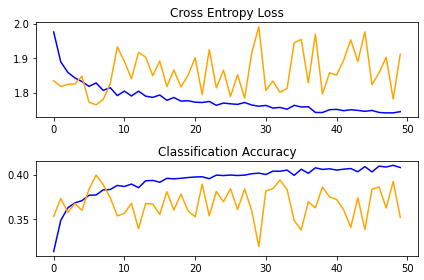

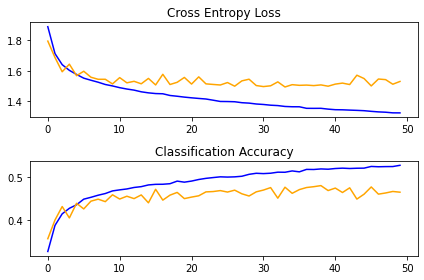

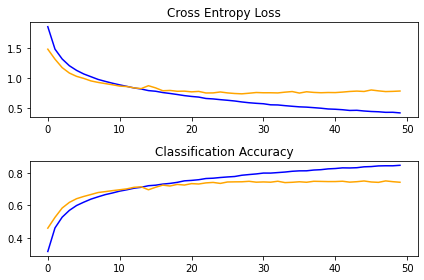

In [46]:
print("NetA Train Accuracy : {}".format(netA.train_accuracy))
print("NetA Test Accuracy : {}".format(netA.test_accuracy))

print("NetB Train Accuracy : {}".format(netB.train_accuracy))
print("NetB Test Accuracy : {}".format(netB.test_accuracy))

print("NetC Train Accuracy : {}".format(netC.train_accuracy))
print("NetC Test Accuracy : {}".format(netC.test_accuracy))
netA.summary(netA.history)
netB.summary(netB.history)
netC.summary(netC.history)


